## NASA - Kepler: Star KIC7671081B Light Curve Waves to
Learning Objective: the purpose of the assignment is to derive feature engineering spectrograms of wave files

In [4]:
# Install needed dependencies
!pip3 install librosa
!pip3 install numba>=0.53

In [5]:
# Mount google drive for audio files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Import dependencies
import librosa
import numpy as np
import numpy as np
import scipy
import matplotlib.pyplot as plt
import librosa.display

# Load audio file
audio_data = "/content/drive/MyDrive/NASA audio files/Star_KIC7671081B.wav"
y, sr = librosa.load(audio_data)
print(type(y), type(sr))
print(y.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(454054,) 22050


In [7]:
librosa.load(audio_data, sr=44100)

(array([ 1.5868711e-09,  6.4384622e-09, -6.2616473e-10, ...,
         4.0395800e-03,  3.1455609e-03,  0.0000000e+00], dtype=float32),
 44100)

In [8]:
# display audio file
import IPython.display as ipd
ipd.Audio(audio_data)

<ipython-input-9-c99b7c59af67>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')


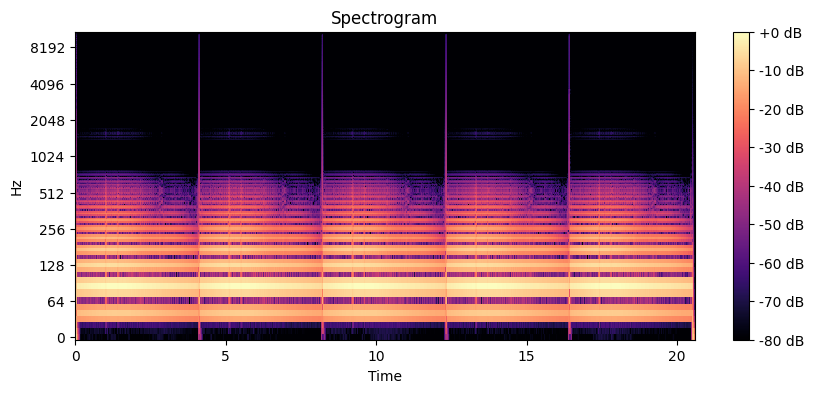

In [9]:
# Display spectrogram
plt.figure(figsize=(10, 4))
D = librosa.stft(y)
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


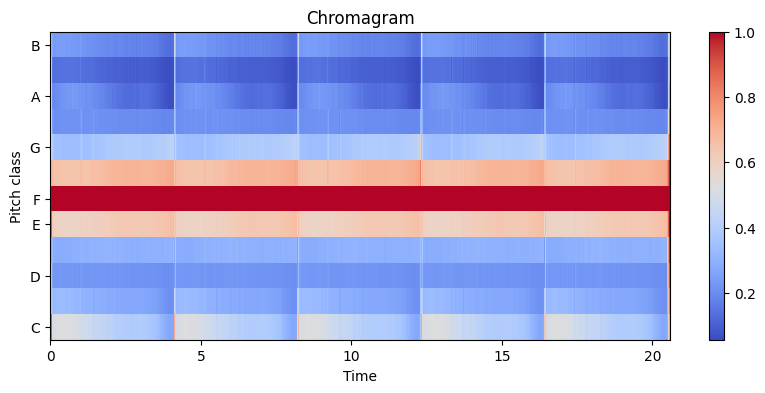

In [10]:
# Compute the chromagram from a waveform or STFT
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(10, 4))
# Display the chromagram: the energy in each chromatic pitch class as a function of time
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chromagram')
plt.show()


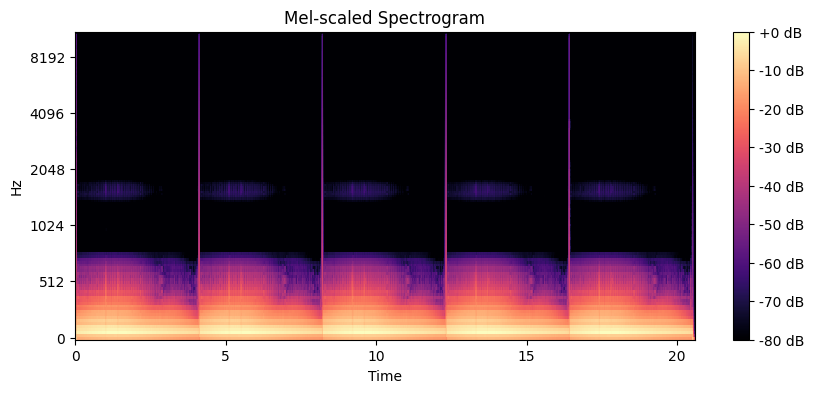

In [11]:
# Display mel-scaled spectrogram
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spect, ref=np.max), x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-scaled Spectrogram')
plt.show()


<ipython-input-12-c9f7455ba754>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(stft_result, ref=np.max), x_axis='time', y_axis='log')


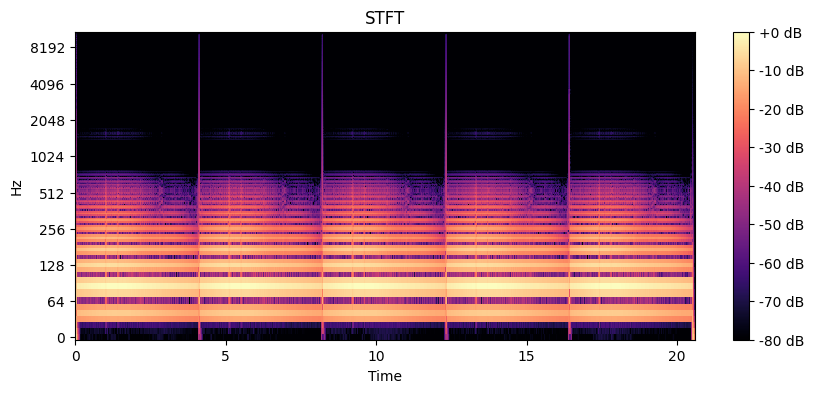

In [12]:
# Display STFT
stft_result = librosa.stft(y)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(stft_result, ref=np.max), x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT')
plt.show()


In [13]:
# Beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
print(f"Tempo: {tempo}")
print(f"Beat frames: {beat_frames}")


Tempo: 143.5546875
Beat frames: [  3  20  37  54  71  89 107 125 143 161 179 196 213 230 247 265 283 301
 319 337 355 372 389 406 424 442 460 478 496 514 532 549 566 583 600 618
 636 654 672 690 708 725 742 759 777 795 813 831 849 867]


<ipython-input-14-d5ac23b38dce>:4: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(cqt_result, ref=np.max), x_axis='time', y_axis='cqt_note')


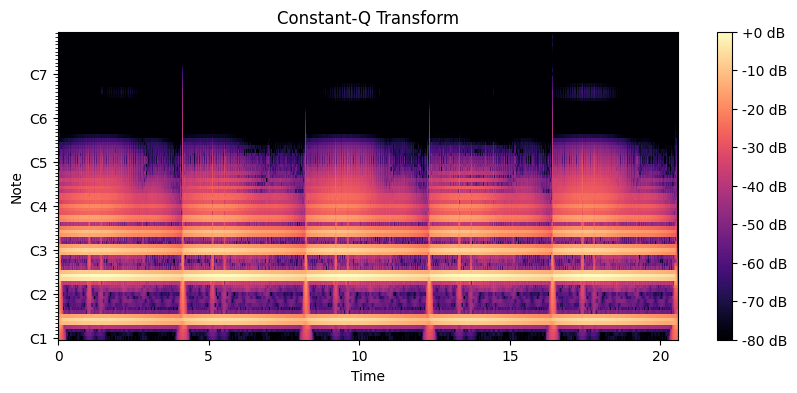

In [14]:
# Display CQT
cqt_result = librosa.cqt(y=y, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(cqt_result, ref=np.max), x_axis='time', y_axis='cqt_note')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q Transform')
plt.show()
